# **Import the necessary libraries**

* **Please upvote if you find it useful**

In [1640]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import xgboost
pd.pandas.set_option('display.max_columns',None)

**Load the Train and Test data**

In [1641]:
train_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [1642]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

**Number of rows and columns in dataset**

In [1643]:
print("Shape of train dataset is",train_df.shape,"Shape of test dataset is",test_df.shape)

Shape of train dataset is (1460, 81) Shape of test dataset is (1459, 80)


**Basic information about dataset.**

In [1644]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1645]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Unique data counts in each column**

In [1646]:
pd.DataFrame(train_df.nunique(),columns=["count"])

,count
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


# **Handling missing values**

**Checking number of null values in each column**

In [1647]:
def nullValues(df):
    total=df.isnull().sum()
    percent=df.isnull().sum()/df.isnull().count()*100
    null_df=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    null_df=null_df[null_df["Percent"]>0]
    null_df=null_df.sort_values(by="Percent",ascending=False)
    print(pd.DataFrame(null_df))
    plt.figure(figsize=(16,10))
    sns.barplot(x=null_df.index,y=null_df["Percent"],color="g")
    plt.xticks(rotation=90)
    plt.xlabel("Null_value_Column")
    plt.ylabel("Percent")

              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493


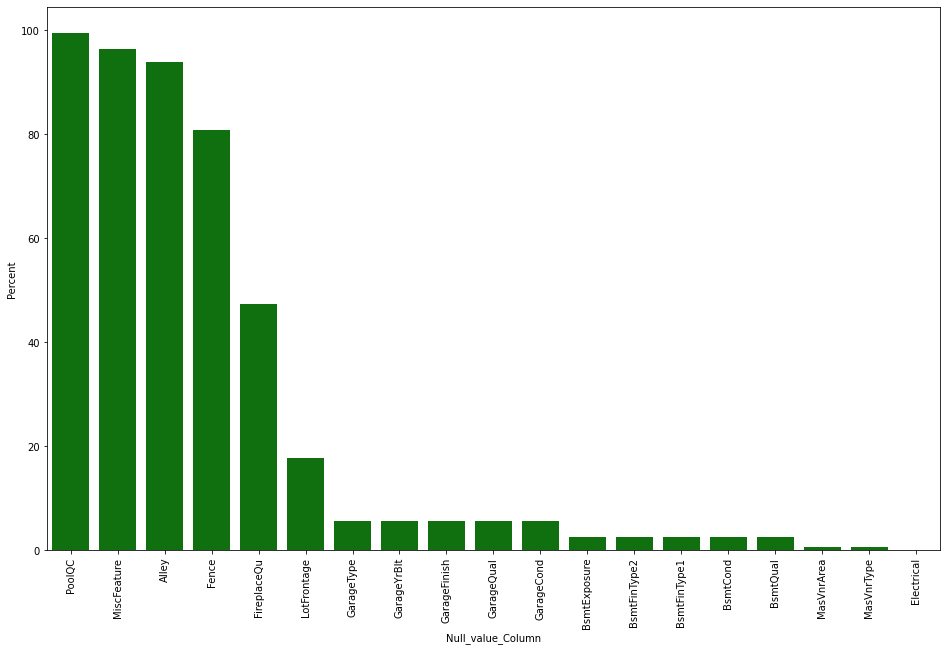

In [1648]:
nullValues(train_df)

<AxesSubplot:>

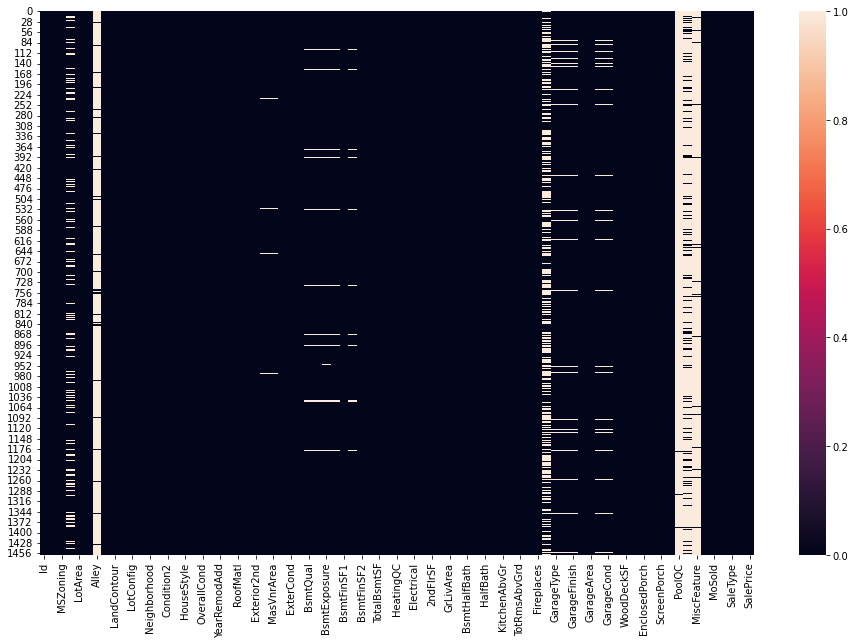

In [1649]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df.isnull())

              Total    Percent
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageCond       78   5.346127
GarageYrBlt      78   5.346127
GarageQual       78   5.346127
GarageFinish     78   5.346127
GarageType       76   5.209047
BsmtCond         45   3.084304
BsmtExposure     44   3.015764
BsmtQual         44   3.015764
BsmtFinType1     42   2.878684
BsmtFinType2     42   2.878684
MasVnrType       16   1.096642
MasVnrArea       15   1.028101
MSZoning          4   0.274160
BsmtFullBath      2   0.137080
BsmtHalfBath      2   0.137080
Functional        2   0.137080
Utilities         2   0.137080
GarageCars        1   0.068540
GarageArea        1   0.068540
TotalBsmtSF       1   0.068540
KitchenQual       1   0.068540
BsmtUnfSF         1   0.068540
BsmtFinSF2        1   0.068540
BsmtFinSF1        1   0.068540
Exterior2nd       1   0.068540
Exterior

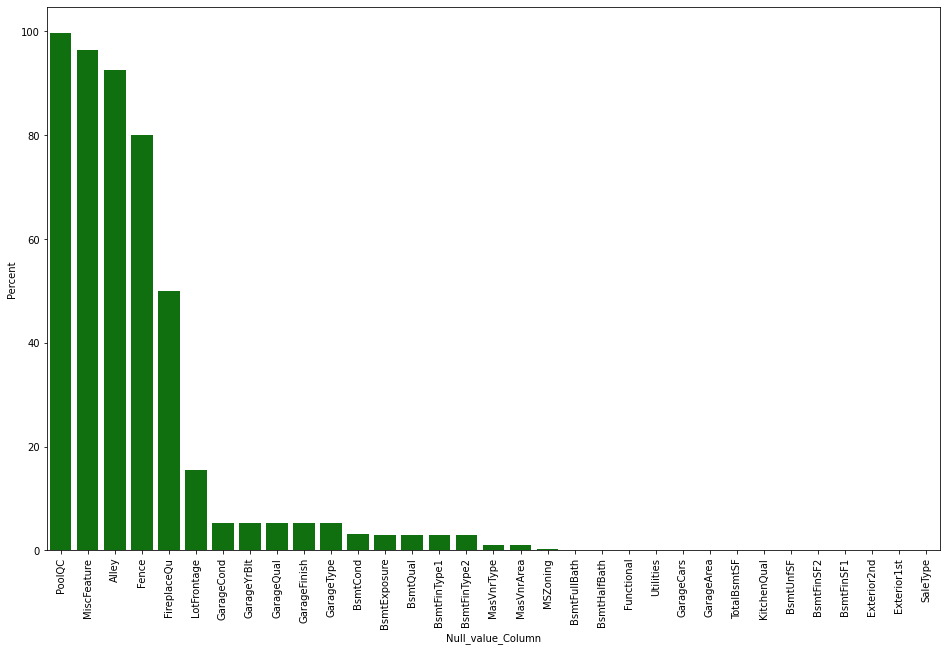

In [1650]:
nullValues(test_df)

<AxesSubplot:>

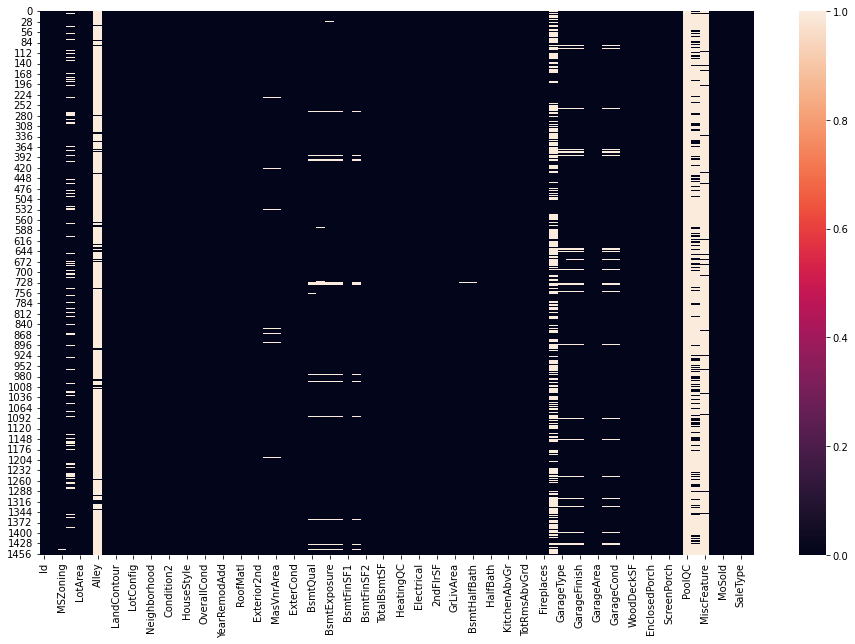

In [1651]:
plt.figure(figsize=(16,10))
sns.heatmap(test_df.isnull())

**Drop Unnecessary columns**

In [1652]:
train_df=train_df.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)
test_df=test_df.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)

* **Id**-> It does not helps in prediction.
* **PoolQC**-> 99.8% data is NaN.
* **MiscFeature**-> 96% data is NaN.
* **Alley**-> 93% data is NaN.
* **Fence**-> 80% data is NaN.
* **FireplaceQu**-> 50% data is NaN.

In [1653]:
columns=train_df.columns

**Listing the Date Columns.**

In [1654]:
year_columns=[column for column in columns if "Year" in column or "Yr" in column ]
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Listing categorical data columns**

In [1655]:
categorical_cols=[column for column in columns if (train_df[column].nunique()<27) and (column not in year_columns)]
categorical_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

**List of continous data columns**

In [1656]:
continous_cols=[column for column in columns if column not in categorical_cols and column not in year_columns]
del(continous_cols[-1])
continous_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

**Handling null values in Categorical columns**

In [1657]:
def handle_cat_null(cols):
    for column in cols:
        train_df[column].fillna(train_df[column].mode()[0],inplace=True)
        test_df[column].fillna(test_df[column].mode()[0],inplace=True)
        

* **Above function replaces null values with frequent value in that column.**

In [1658]:
train_df=train_df.replace()

In [1659]:
handle_cat_null(categorical_cols)
train_df[categorical_cols].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
3SsnPorch        0
PoolArea         0
MiscVal          0
MoSold      

* **Now Categorical data handled properly**

**Handling the null values in continous columns**

In [1660]:
def handle_cont_cols(cols):
    for column in cols:
        train_df[column].fillna(train_df[column].mean(),inplace=True)
        test_df[column].fillna(test_df[column].mean(),inplace=True)

* **Above function fills null values with mean of that column**

In [1661]:
handle_cont_cols(continous_cols)
train_df[continous_cols].isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64

* **Continous data hanlded now**

**Lets hanlde temporal column that is Date columns**

In [1662]:
train_df[year_columns].isnull().sum()

YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
YrSold          0
dtype: int64

* **There are 81 null values in GarageYrBlt**

In [1663]:
test_df[year_columns].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     78
YrSold           0
dtype: int64

* **There are 78 null values in GarageYrBlt**

In [1664]:
pd.pandas.set_option('display.max_columns',None)
train_df[["YearBuilt","GarageYrBlt"]]

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0
...,...,...
1455,1999,1999.0
1456,1978,1978.0
1457,1941,1941.0
1458,1950,1950.0


* **From the above dataset we can observe that YearBuilt and GarageYrBlt column has almost same values**

In [1665]:
train_df["GarageYrBlt"]=train_df.GarageYrBlt.fillna(train_df["YearBuilt"])
test_df["GarageYrBlt"]=test_df.GarageYrBlt.fillna(test_df["YearBuilt"])

* **Replacing the null values with YearBuilt column data in both train and test dataset**

In [1666]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

* **All the train data handled properly**

In [1667]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

* **All the train data handled properly**

# **Data Visualization**

**Bar Charts for Categorical data**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


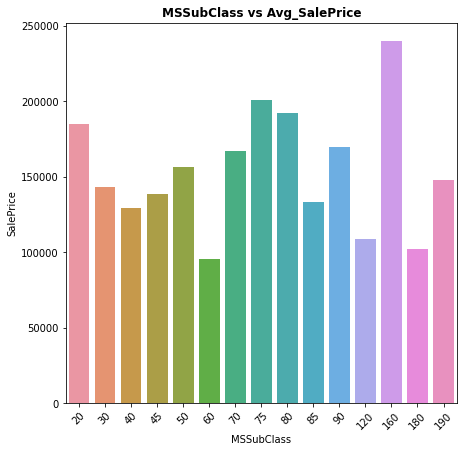

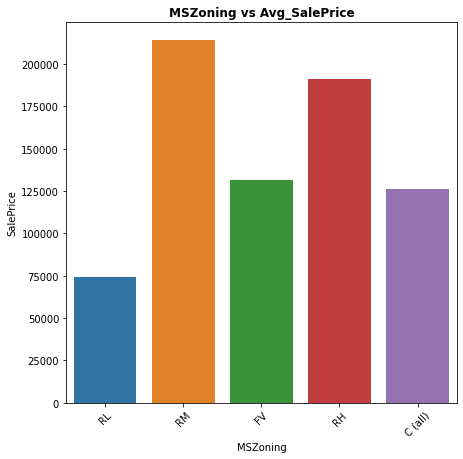

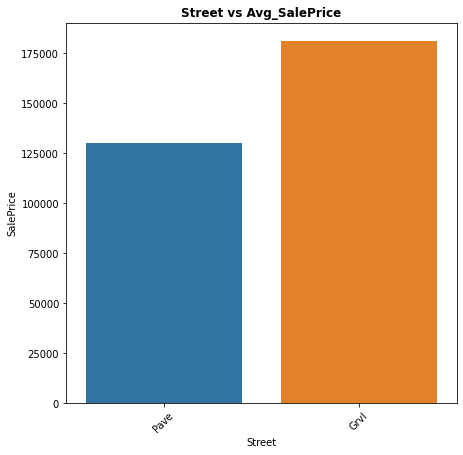

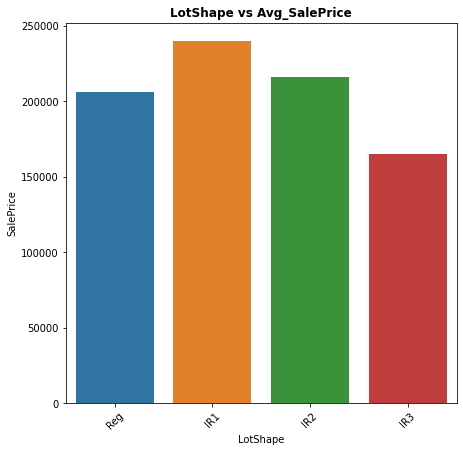

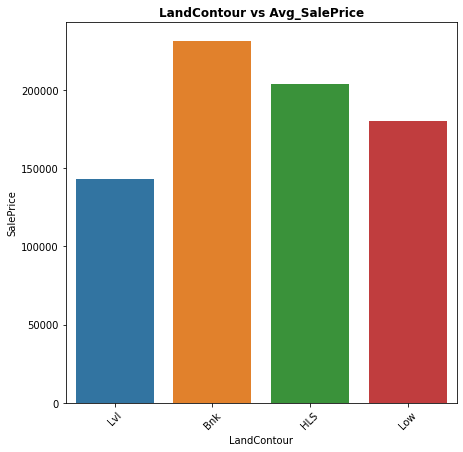

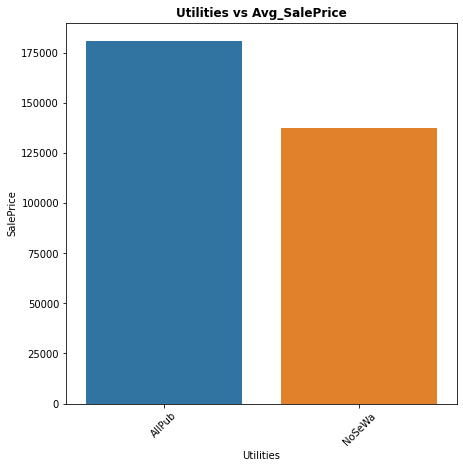

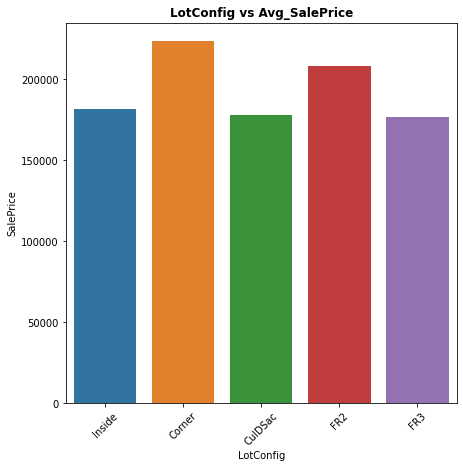

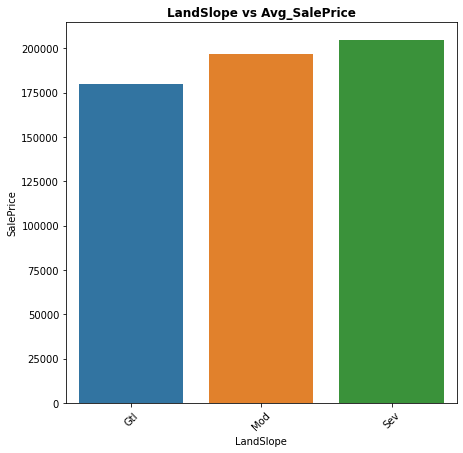

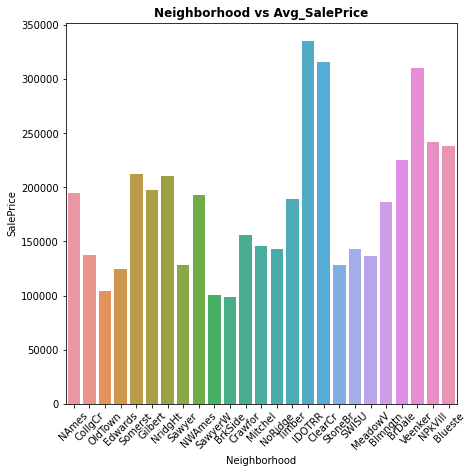

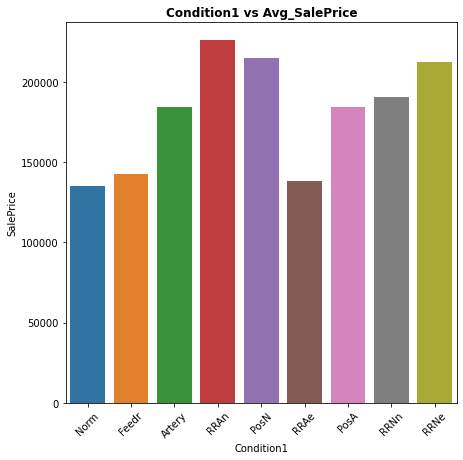

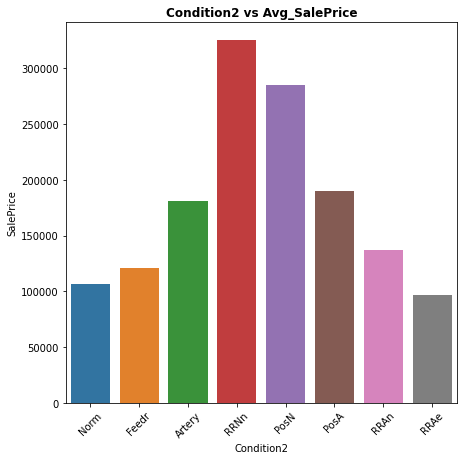

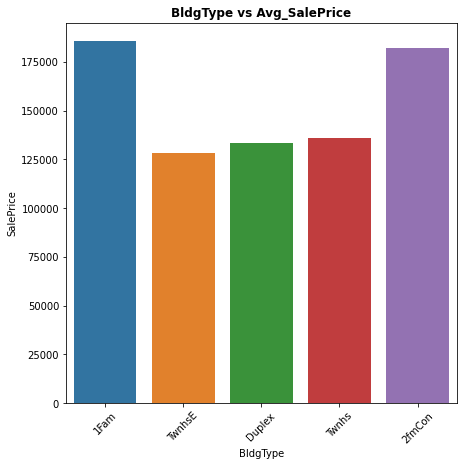

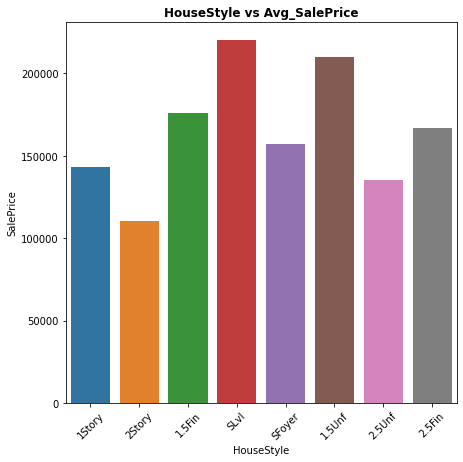

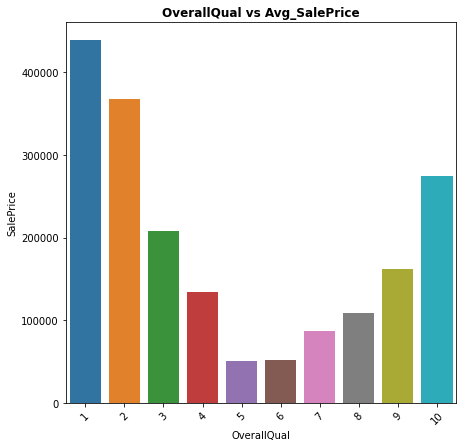

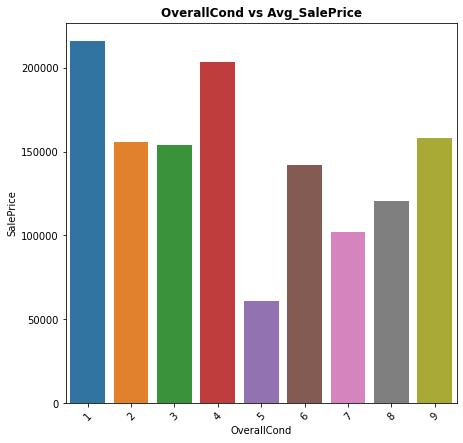

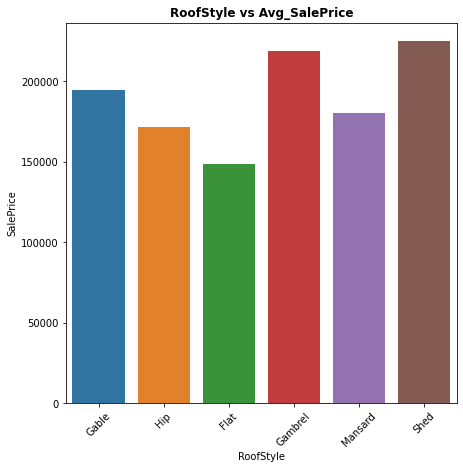

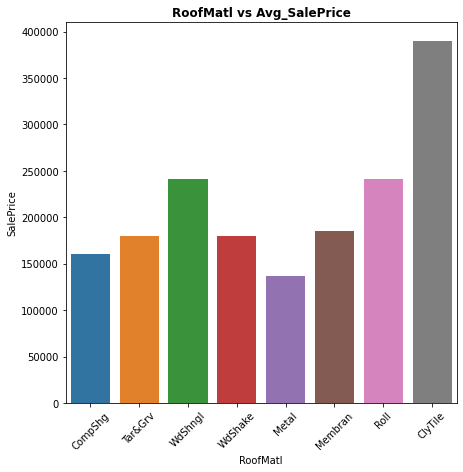

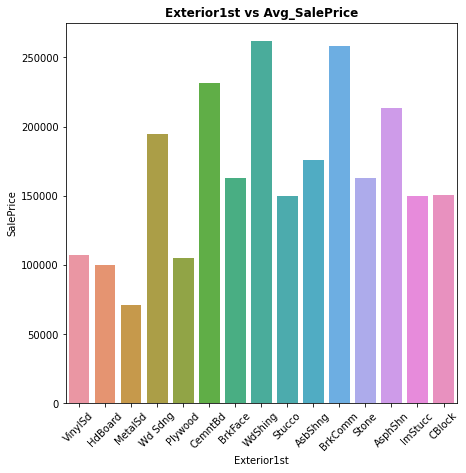

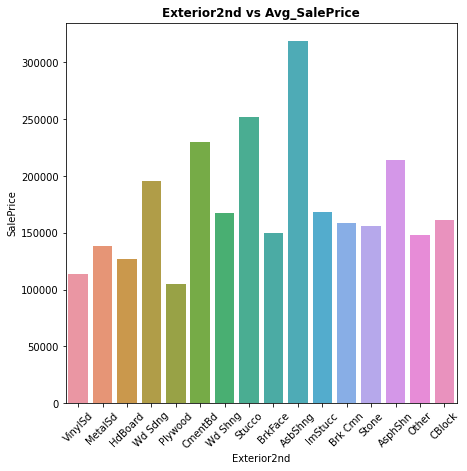

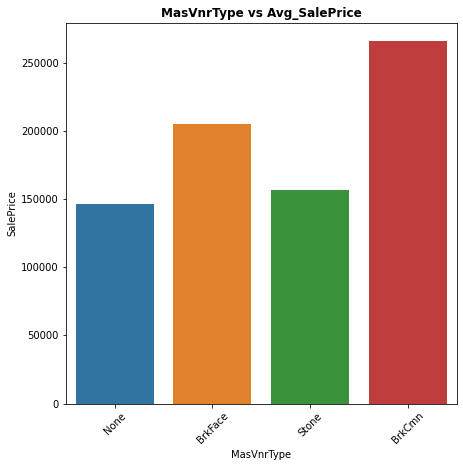

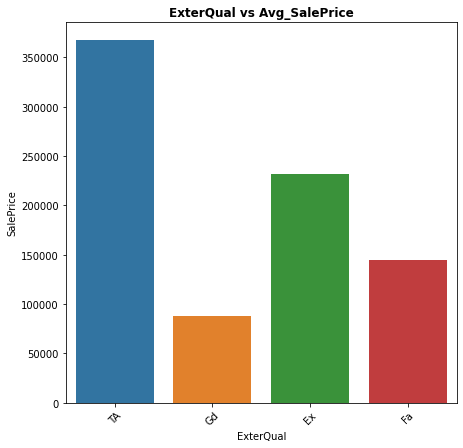

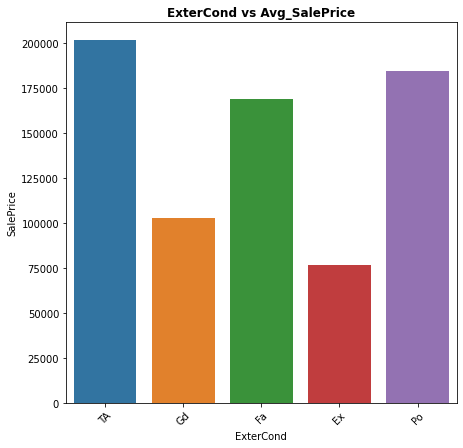

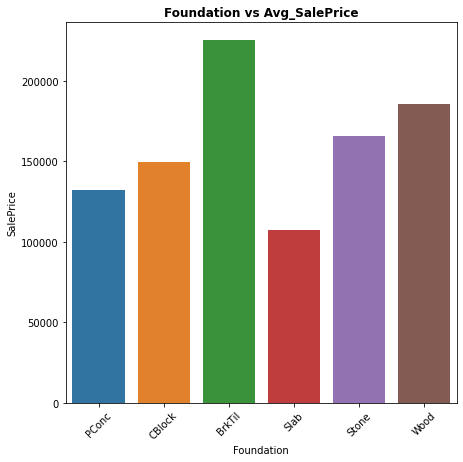

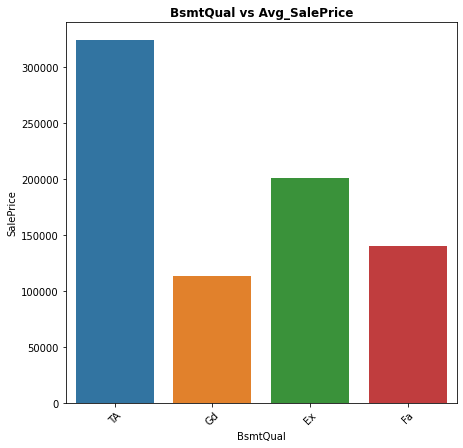

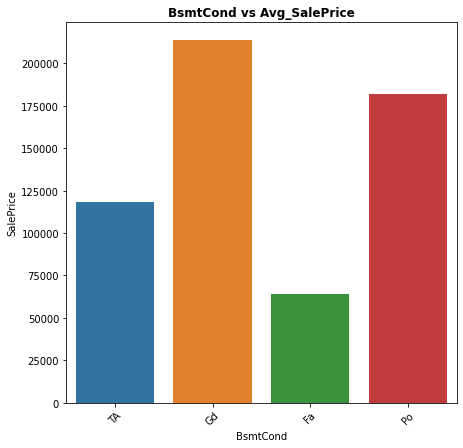

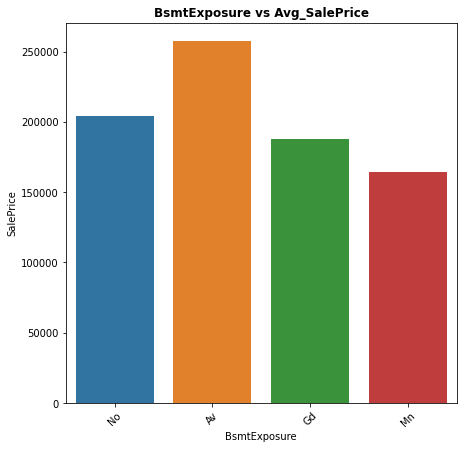

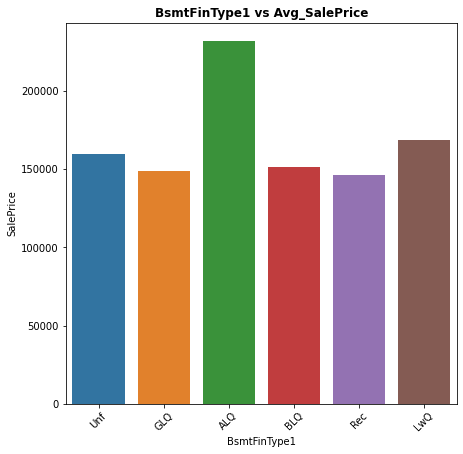

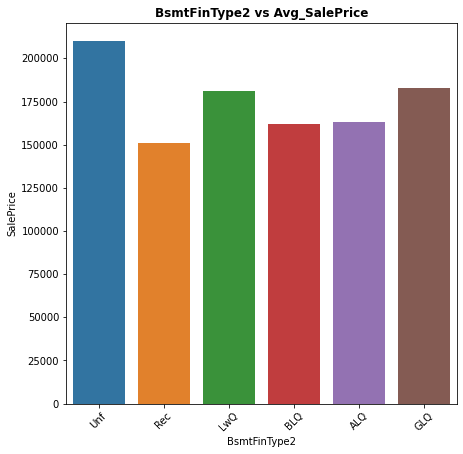

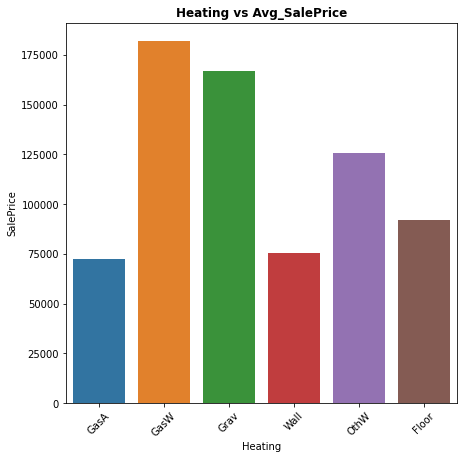

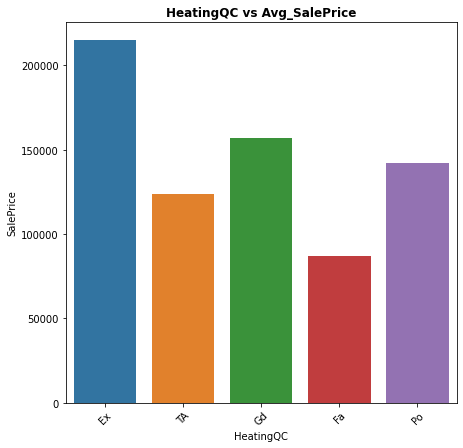

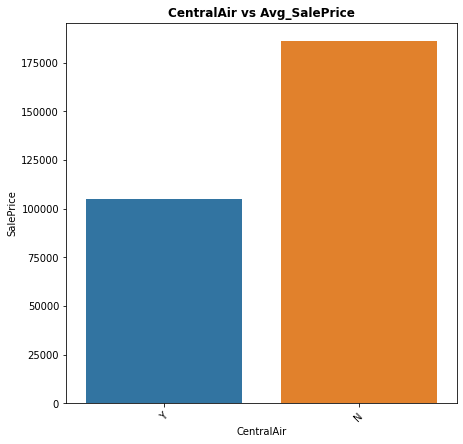

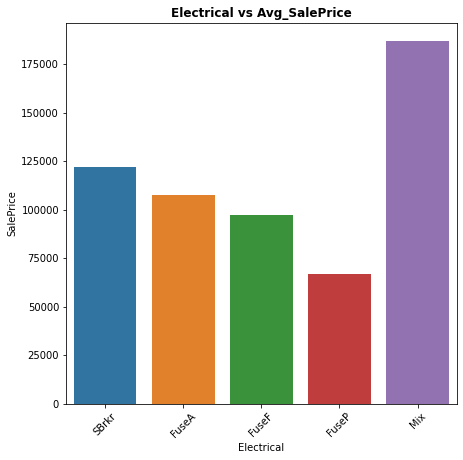

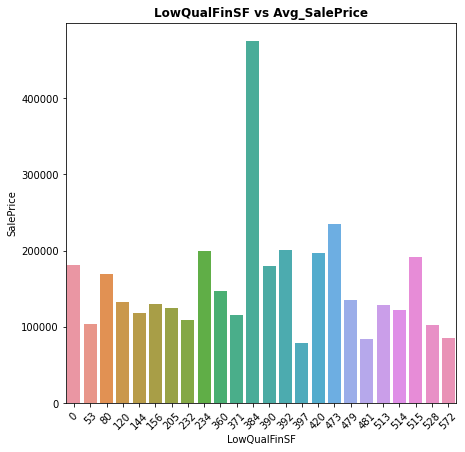

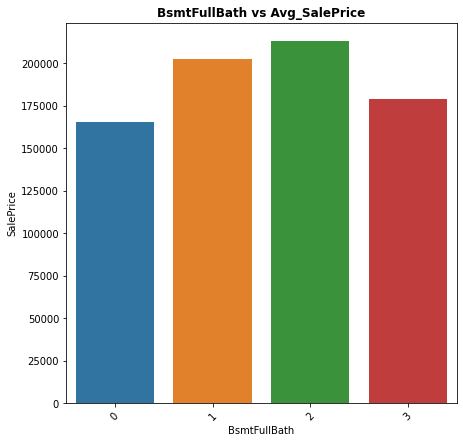

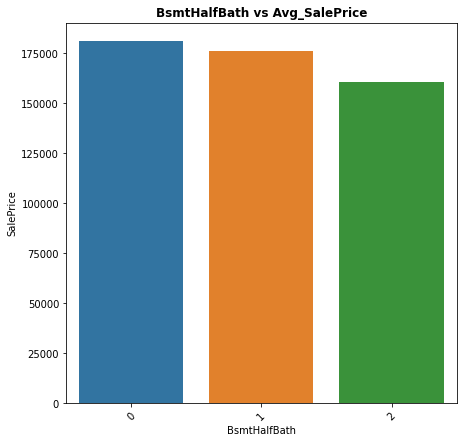

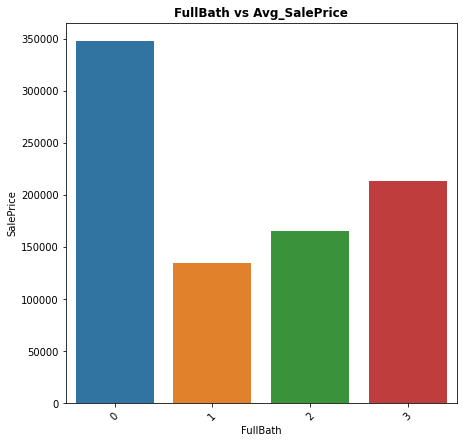

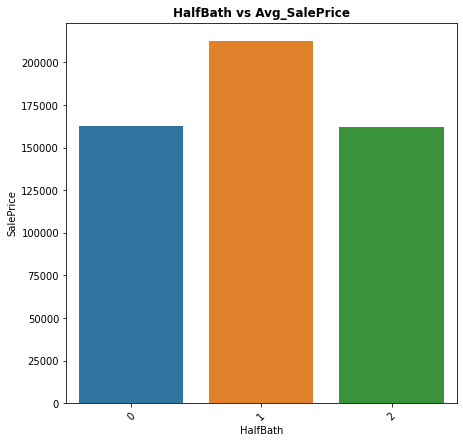

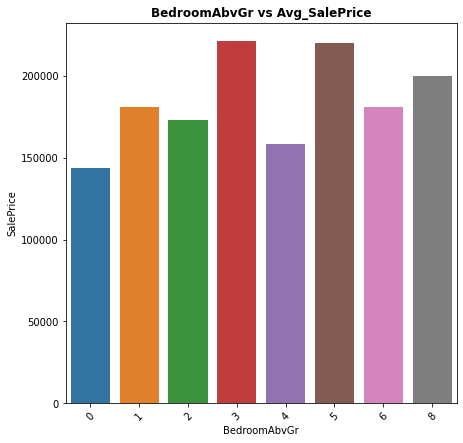

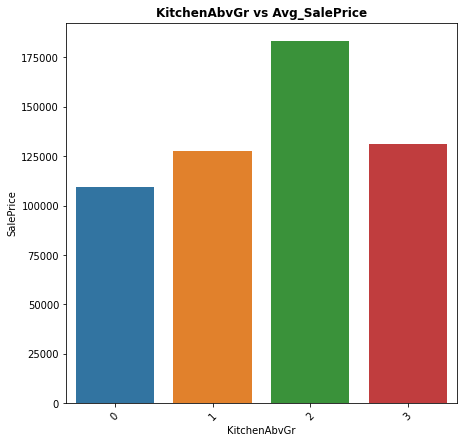

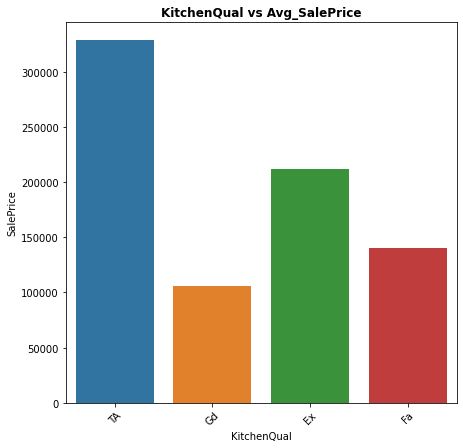

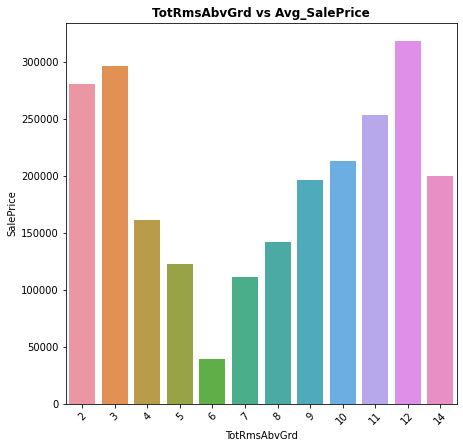

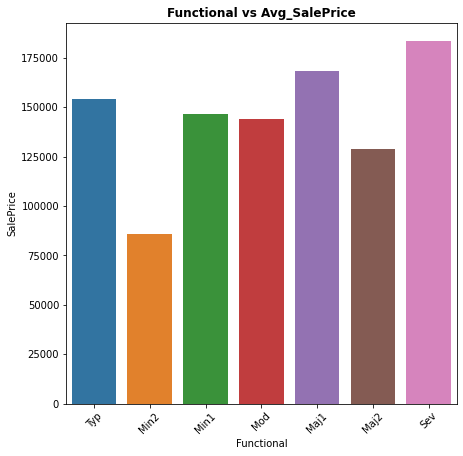

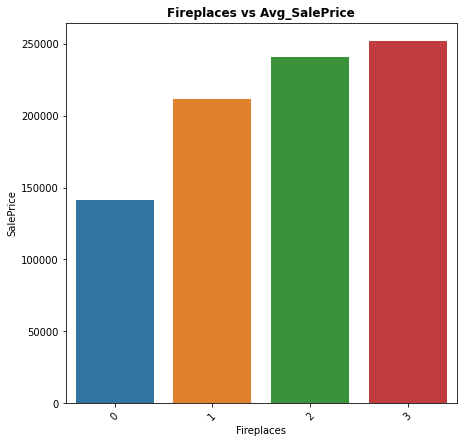

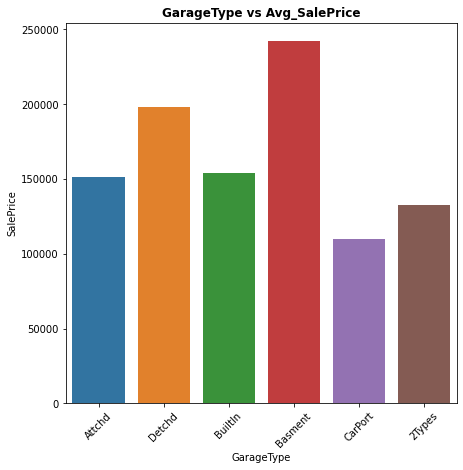

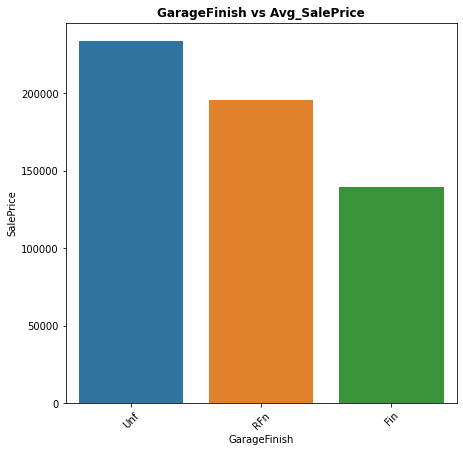

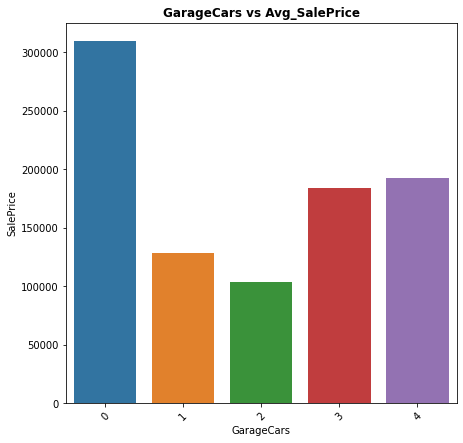

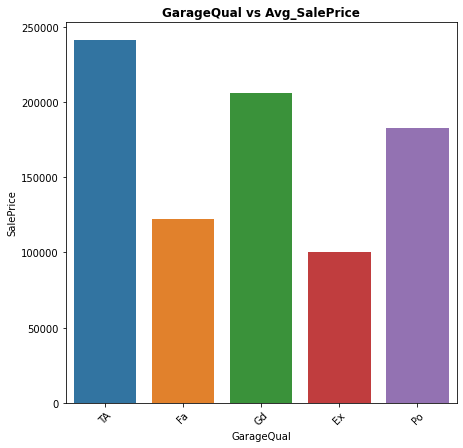

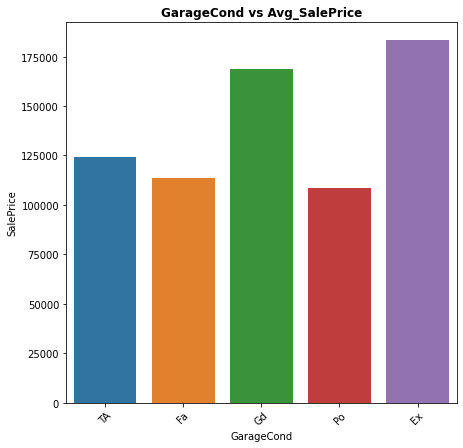

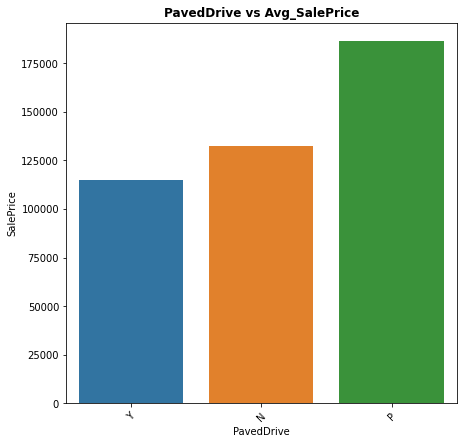

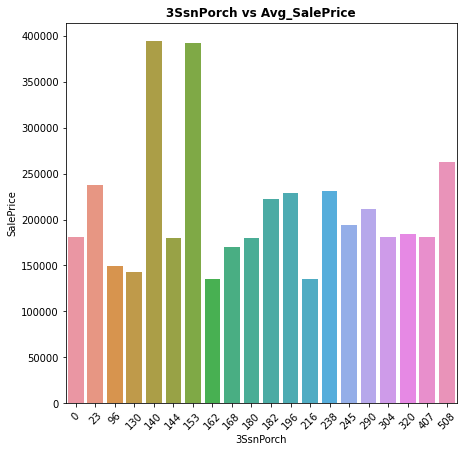

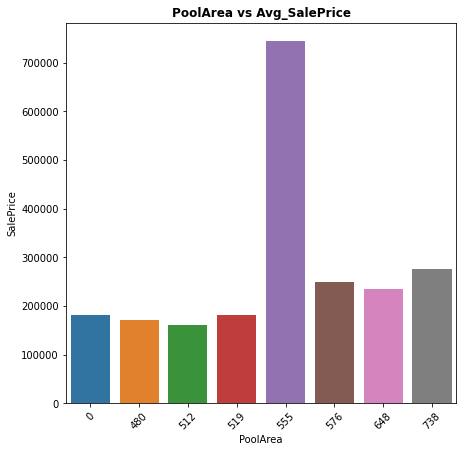

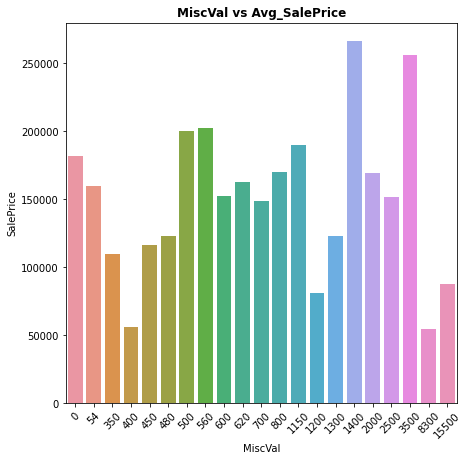

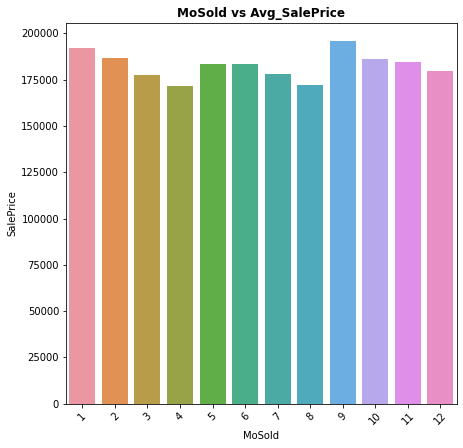

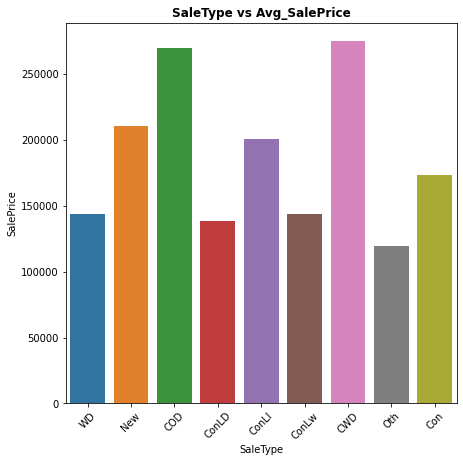

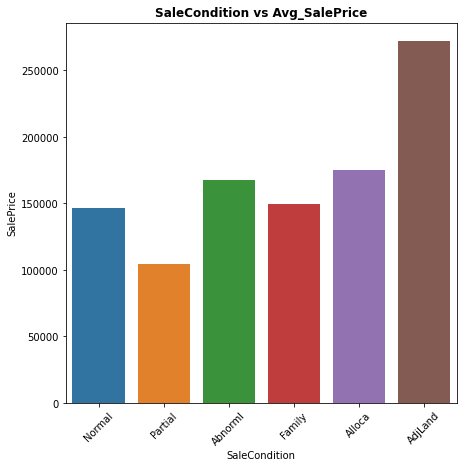

In [1668]:
for column in categorical_cols:
    plt.figure(figsize=(7,7))
    #train_df.groupby(column).mean()["SalePrice"].plot.bar()
    sns.barplot(x=train_df[column].value_counts().index,y=train_df.groupby(column).mean()["SalePrice"])
    plt.xlabel(str(column))
    plt.title(str(column)+" vs "+"Avg_SalePrice",fontweight="bold")
    plt.xticks(rotation=45)

**Scatter Plot for continoud data**

<Figure size 1152x720 with 0 Axes>

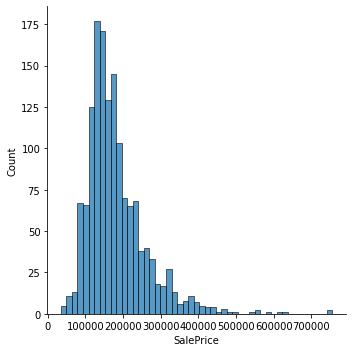

In [1669]:
plt.figure(figsize=(16,10))
sns.displot(train_df["SalePrice"],)

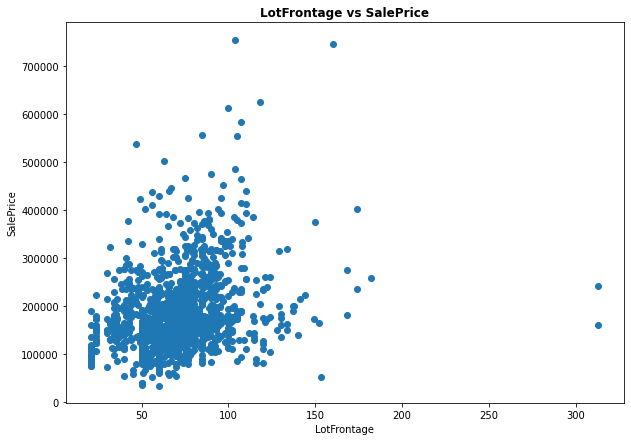

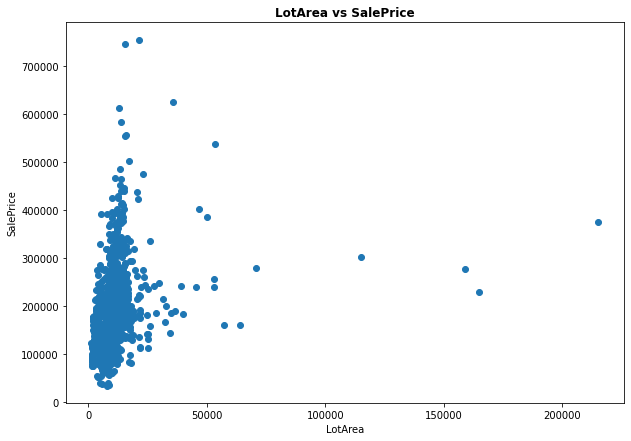

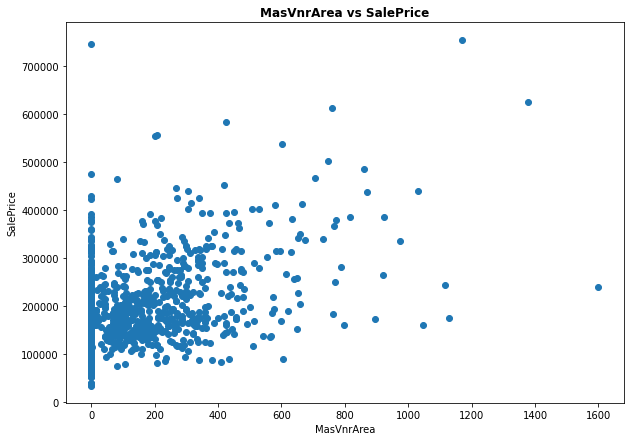

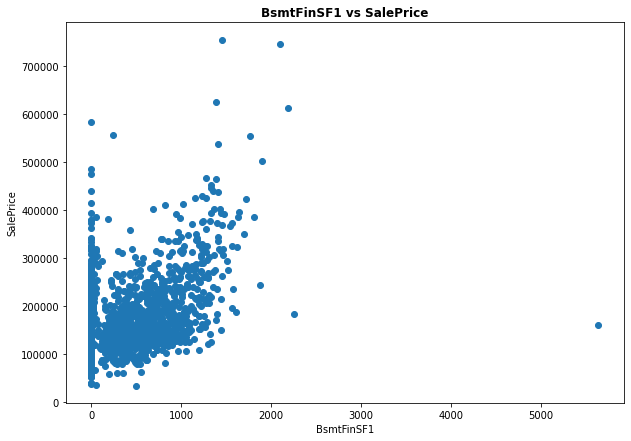

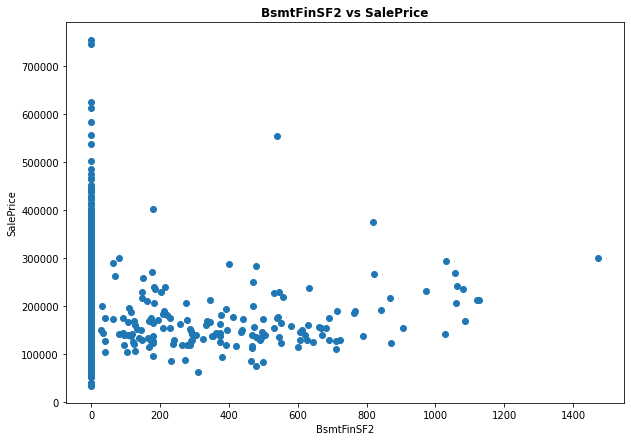

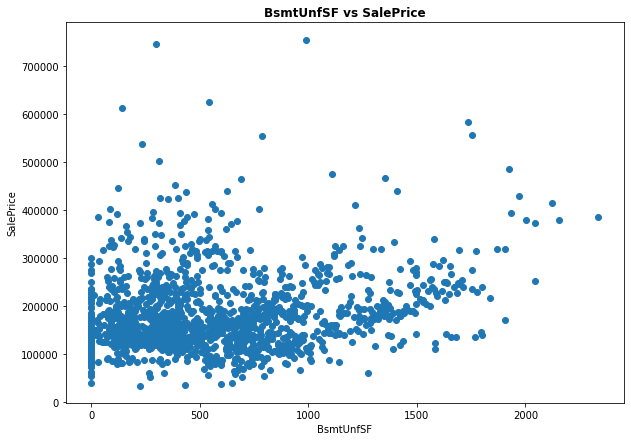

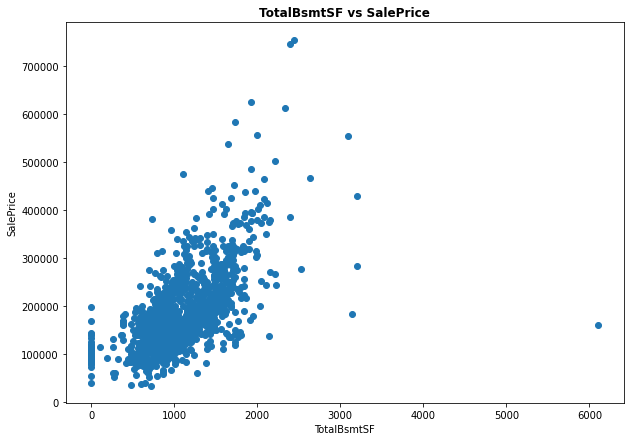

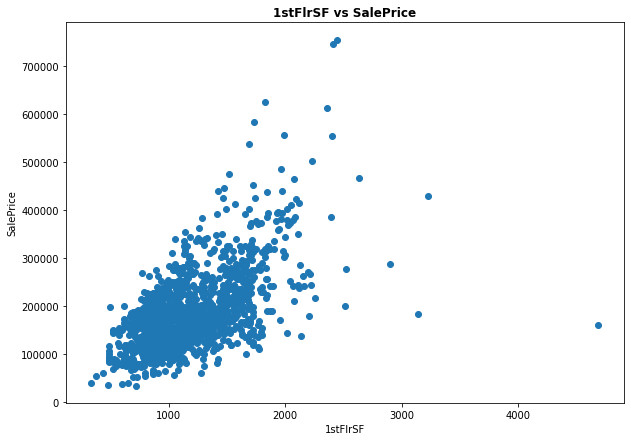

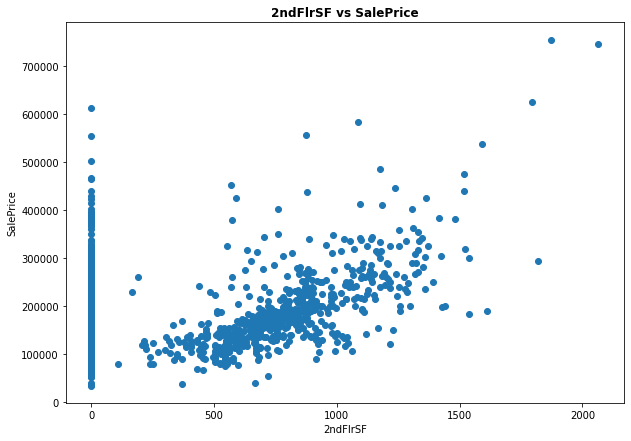

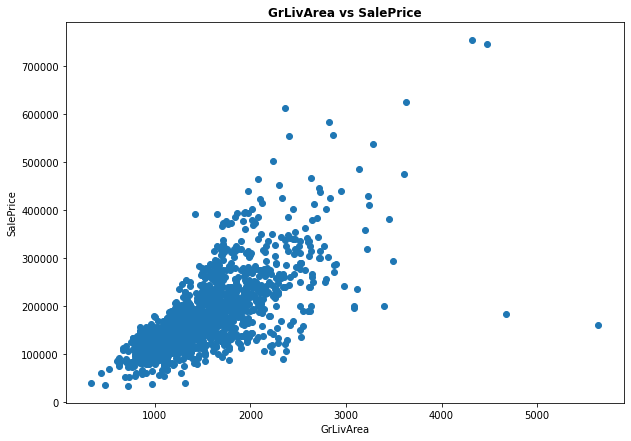

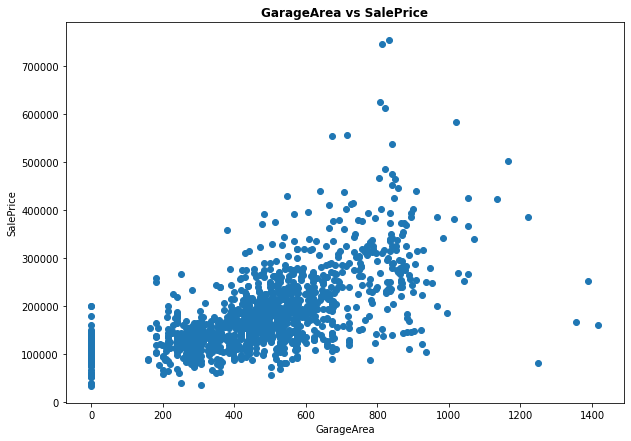

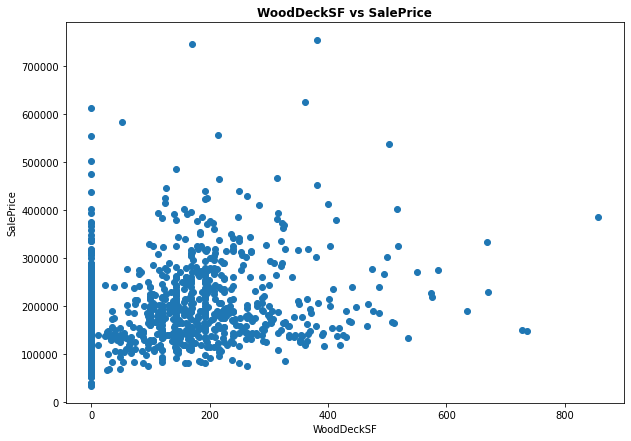

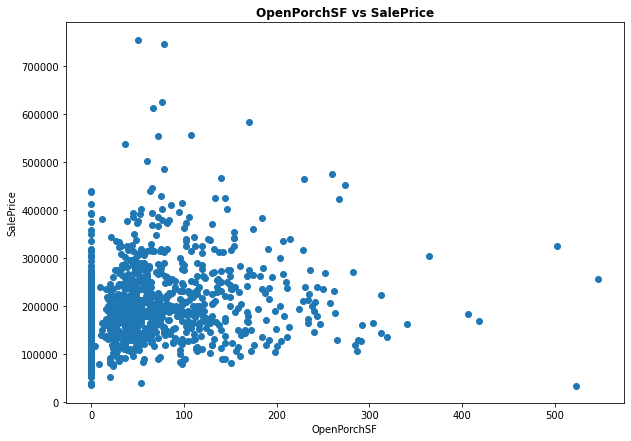

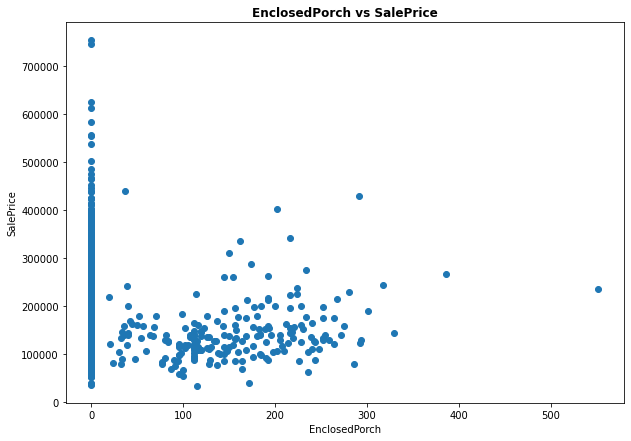

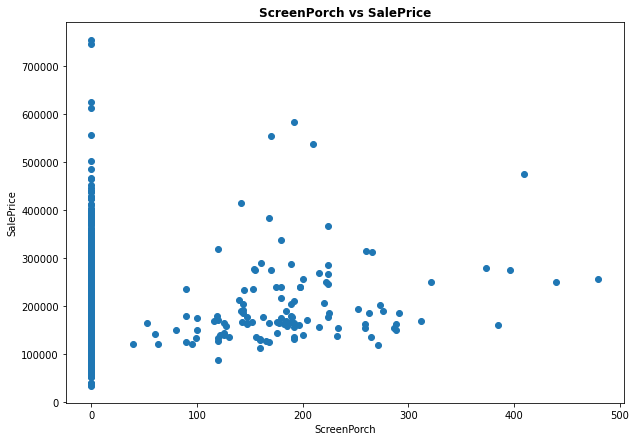

In [1670]:
for column in continous_cols:
    plt.figure(figsize=(10,7))
    plt.scatter(train_df[column],train_df["SalePrice"])
    plt.xlabel(str(column))
    plt.ylabel("SalePrice")
    plt.title(column+" vs "+"SalePrice",fontweight="bold")

In [1671]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [1672]:
train_df.shape,test_df.shape

((1460, 75), (1459, 74))

**Target Variable=y**

In [1673]:
y=train_df["SalePrice"]

In [1674]:
train_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.343125,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023039,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.079045,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.343125,1.000000,0.272696,0.215195,-0.058140,0.107828,0.069945,0.165727,0.188568,0.044697,0.114749,0.328055,0.373312,0.070897,0.031711,0.336470,0.081472,-0.014783,0.168800,0.050319,0.226910,-0.015800,0.294840,0.210444,0.053036,0.253898,0.295725,0.044805,0.116196,-0.005835,0.035757,0.039751,0.149435,-0.006256,0.020600,0.006237,0.298490
LotArea,-0.139781,0.272696,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103227,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.026193,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.215195,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410111,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.497888,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.058140,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.126723,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306554,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.107828,0.014228,0.572323,-0.375983,1.000000,0.592855,0.313658,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.760414,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.069945,0.013788,0.550684,0.073741,0.592855,1.000000,0.178270,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.609174,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023039,0.165727,0.103227,0.410111,-0.126723,0.313658,0.178270,1.000000,0.263223,-0.071904,0.112950,0.360982,0.340373,0.174902,-0.068853,0.389331,0.085281,0.026892,0.274542,0.200772,0.102200,-0.038876,0.279581,0.247539,0.241145,0.362874,0.372113,0.158901,0.126671,-0.110614,0.018895,0.061664,0.011781,-0.029684,-0.007835,-0.008180,0.474526
BsmtFinSF1,-0.069836,0.188568,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263223,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153555,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.044697,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071904,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.083323,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [1675]:
train_df=train_df.drop(["SalePrice"],axis=1)

**Lets concatenate train_df and test_df along rows**

In [1676]:
final_df=pd.concat([train_df,test_df],axis=0)
final_df=final_df.drop(columns=["MSSubClass","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","MiscVal","EnclosedPorch","3SsnPorch","ScreenPorch"
])

In [1677]:
final_df = final_df.replace({
                       "BsmtCond" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "BsmtExposure" : {"No" : 1, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 1, "Unf" : 1, "LwQ": 2, "Rec" : 2, "BLQ" : 3, 
                                         "ALQ" : 3, "GLQ" : 3},
                       "BsmtFinType2" : {"No" : 1, "Unf" : 1, "LwQ": 2, "Rec" : 2, "BLQ" : 3, 
                                         "ALQ" : 53, "GLQ" : 3},
                       "BsmtQual" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA": 2, "Gd" : 3, "Ex" : 3},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 2, "Gd": 3, "Ex" : 3},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 2, "Gd": 3, "Ex" : 3},
                       "FireplaceQu" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "Functional" : {"Sal" : 1, "Sev" : 1, "Maj2" : 2, "Maj1" : 2, "Mod": 3, 
                                       "Min2" : 3, "Min1" : 3, "Typ" : 4},
                       "GarageCond" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "GarageQual" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 2, "Reg" : 3},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 1, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
                       
})

* **We replaced with 1,2,3 values for many columns. Because those column possess ordinal data(It means in order i.e low,avg,high)**

In [1678]:
len(categorical_cols)

55

# **Converting categorical data into numerical data using get_dummies() function**

In [1679]:
final_df=pd.get_dummies(data=final_df,columns=[
 'MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath', 
 'TotRmsAbvGrd', 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'SaleType',
 'SaleCondition',"MoSold",'BedroomAbvGr',
 'KitchenAbvGr',"PoolArea",],drop_first=True)

In [1680]:
final_df.shape

(2919, 240)

**Lets split train and test data from final_df along row.**

In [1681]:
train_df=final_df.iloc[:1460,:]
train_df

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,Functional,GarageYrBlt,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_561,PoolArea_576,PoolArea_648,PoolArea_738,PoolArea_800
0,65.0,8450,2,3,4,3,7,5,2003,2003,196.0,3,2,3,2,1,3,706.0,1,150.0,856.0,3,856,854,1710,3,4,2003.0,548.0,2,2,2,0,61,2008,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [1682]:
test_df=final_df.iloc[1460:,:]
test_df

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,Functional,GarageYrBlt,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_561,PoolArea_576,PoolArea_648,PoolArea_738,PoolArea_800
0,80.0,11622,2,3,4,3,5,6,1961,1961,0.0,2,2,2,2,1,2,468.0,2,270.0,882.0,2,896,0,896,2,4,1961.0,730.0,2,2,2,140,0,2010,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

# **Scaling the data using StandardScaler()**

In [1683]:
scaler=StandardScaler()
train_df=scaler.fit_transform(train_df)
test_df=scaler.fit_transform(test_df)

**Split the data**

In [1684]:
X=train_df
y=y #check previous boxes for y value
X_train,X_test,y_train,y_test=train_test_split(train_df,y,test_size=0.27,random_state=42)

# **Prediction using different Advanced Regression Techniques**

# **1.** **XG Boost Regressor**

In [1685]:
from sklearn.model_selection import cross_val_score

**Fit the model and predicting**

In [1686]:
xg=xgboost.XGBRegressor()
xg.fit(X_train,y_train)
y_test_pred_xg=xg.predict(X_test)

**Performance check**

In [1687]:
xg.score(X_train,y_train)
xg.score(X_test,y_test)
result_xg=cross_val_score(xg,X,y,cv=10,scoring="r2").mean()*100
print("Cross validated score for XGB Regressor model is",result_xg)

Cross validated score for XGB Regressor model is 86.39209734091109


# **2. Random Forest Regressor**

**Fit the model and predicting**

In [1688]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_test_pred_rf=rf.predict(X_test)

**Performance check**

In [1689]:
rf.score(X_train,y_train)
rf.score(X_test,y_test)
result_rf=cross_val_score(rf,X,y,cv=10,scoring="r2").mean()*100
print("Cross validated score for Random Forest Regressor model is",result_rf)

Cross validated score for Random Forest Regressor model is 86.84969803350715


# **3. Gradient Boosting Regressor**

**Fit the model and predicting**

In [1741]:
gb=GradientBoostingRegressor(learning_rate=0.1)
gb.fit(X_train,y_train)
y_test_pred_gb=gb.predict(X_test)

**Performance check**

In [1742]:
gb.score(X_train,y_train)
gb.score(X_test,y_test)
result_gb=cross_val_score(gb,X,y,cv=10,scoring="r2").mean()*100
print("Cross validated score for Gradient Boosting Regressor model is",result_gb)

Cross validated score for Gradient Boosting Regressor model is 89.00294123012067


# **4. Decision Tree Regressor**

**Fit the model and predicting**

In [1743]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_test_pred_dt=dt.predict(X_test)

**Performance check**

In [1744]:
dt.score(X_train,y_train)
dt.score(X_test,y_test)
result_dt=cross_val_score(dt,X,y,cv=10,scoring="r2").mean()*100
print("Cross validated score for Decision Tree Regressor model is",result_dt)

Cross validated score for Decision Tree Regressor model is 70.57265116881172


# **5. AdaBoost Regressor**

**Fit the model and predicting**

In [1745]:
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
y_test_pred_ab=ab.predict(X_test)

**Performance check**

In [1746]:
ab.score(X_train,y_train)
ab.score(X_test,y_test)
result_ab=cross_val_score(gb,X,y,cv=10,scoring="r2").mean()*100
print("Cross validated score for Adaboost Regressor model is",result_ab)

Cross validated score for Adaboost Regressor model is 89.05019368334506


# **Results**

In [1747]:
pd.DataFrame({"Model":["XGBoost","RandomForest","GradientBoosting","DecisionTree","AdaBoost"],"Score":[result_xg,result_rf,result_gb,result_dt,result_ab]})

,Model,Score
0,XGBoost,86.392097
1,RandomForest,86.849698
2,GradientBoosting,89.002941
3,DecisionTree,70.572651
4,AdaBoost,89.050194


In [1748]:
submission=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [1749]:
submission["SalePrice"]=gb.predict(test_df)

In [1750]:
submission.to_csv("final_hppp.csv")